In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

original_df = pd.read_csv("EWKino-train.csv")
output_df = pd.read_csv("0.005-learning-rate-prediction-vs-target-6layer-128node-200epoch.csv")
sorted_output_df = output_df.sort_values(by="Targets")

In [7]:
mean_DM = original_df["DM_relic_density"].mean()
std_DM = original_df["DM_relic_density"].std()

predictions = sorted_output_df["Predictions"].values
targets = sorted_output_df["Targets"].values

# Unnormalise the targets and predictions so that we can compare with original targets. unf stands for unnormalised form
unf_targets = targets * std_DM
unf_targets += mean_DM
unf_predictions = predictions * std_DM
unf_predictions += mean_DM

print(f"MAE: {(np.abs(predictions-targets)).mean()}")
print(f"Absolute mean of targets: {(np.abs(targets)).mean()}")

MAE: 0.1941594950795095
Absolute mean of targets: 0.824483299784071


In [56]:
def plot_mae_by_bins(true_values, predicted_values, num_bins):
    
    # Calculate absolute errors
    abs_errors = np.abs(true_values - predicted_values)
    
    # Create bins
    bins = np.linspace(true_values.min(), true_values.max(), num_bins + 1)
    
    # Compute mean absolute error for each bin
    mae_by_bin = []
    bin_centers = []
    
    for i in range(num_bins):
        # Find indices of values in this bin. Unnecessary given targets are sorted 
        bin_mask = (true_values >= bins[i]) & (true_values < bins[i+1])
        
        # Calculate MAE for this bin
        if np.sum(bin_mask) > 0:
            mae = np.mean(abs_errors[bin_mask])
            mae_by_bin.append(mae)
            bin_centers.append((bins[i] + bins[i+1]) / 2)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.bar(bin_centers, mae_by_bin, width=(bins[1]-bins[0])*0.9)
    
    plt.title('Mean Absolute Error by True Relic Density Bins')
    plt.xlabel('True Relic Density (normalised log scale)')
    plt.ylabel('Mean Absolute Error')
    plt.grid(axis='y', linestyle='--')
    
    # Add mae values on top of each bar
    for i, mae in enumerate(mae_by_bin):
        plt.text(bin_centers[i], mae, f'{mae:.3f}', ha='center', va='bottom')
    
    plt.tight_layout()
    
    return plt.gcf(), plt.gca()

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Mean Absolute Error by True Relic Density Bins'}, xlabel='True Relic Density (normalised log scale)', ylabel='Mean Absolute Error'>)

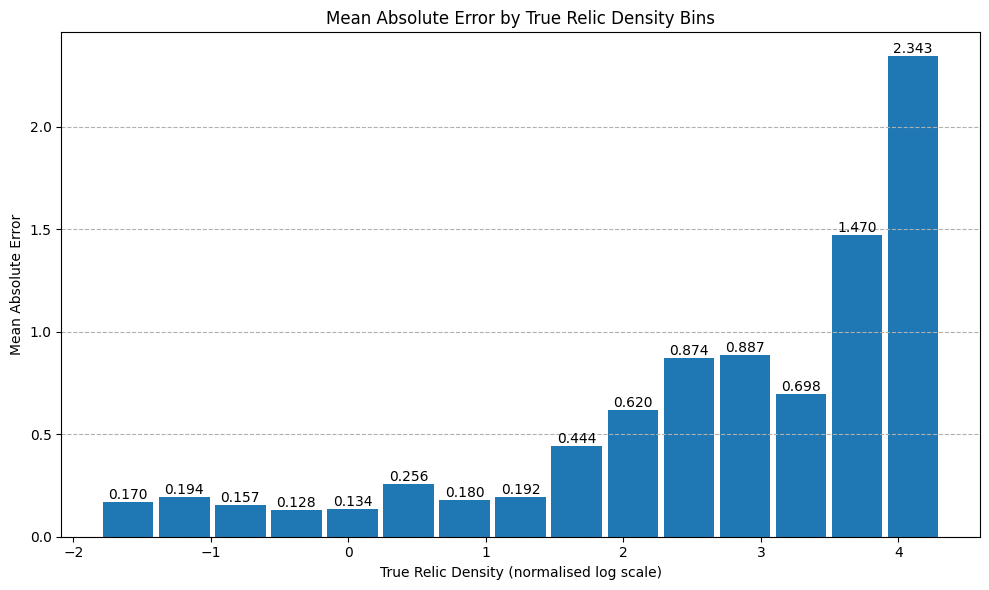

In [57]:
plot_mae_by_bins(targets, predictions, 15)

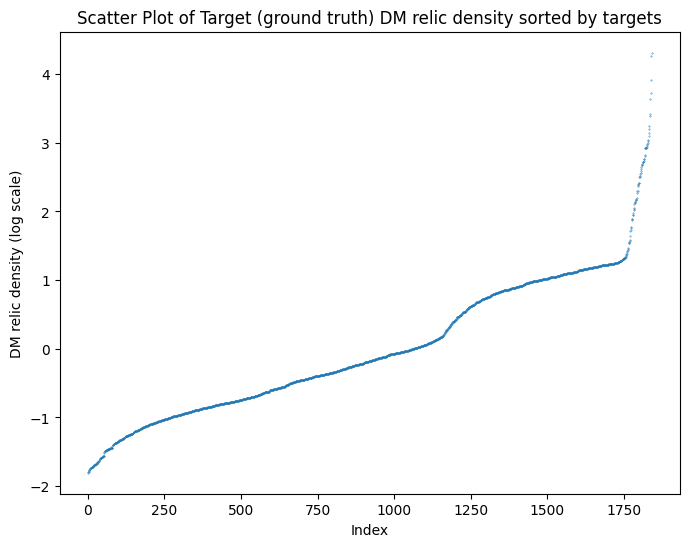

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(targets)), targets, s=0.1)

# Add labels and title
plt.xlabel("Index")
plt.ylabel("DM relic density (log scale)")
plt.title(f"Scatter Plot of Target (ground truth) DM relic density sorted by targets")

# Save the plot
plt.savefig(f"plots/DM_predictor_performance/DM-targets.png")

# Show the plot
plt.show()

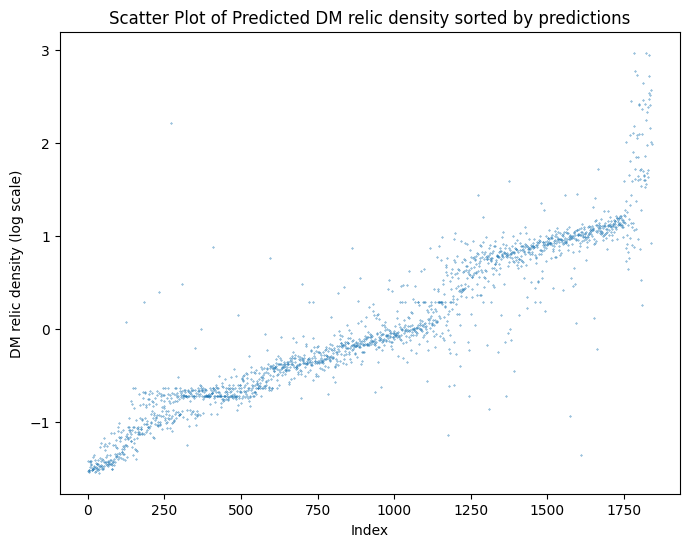

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(predictions)), predictions, s=0.1)

# Add labels and title
plt.xlabel("Index")
plt.ylabel("DM relic density (log scale)")
plt.title(f"Scatter Plot of Predicted DM relic density sorted by predictions")

# Save the plot
plt.savefig(f"plots/DM_predictor_performance/DM-predictions.png")

# Show the plot
plt.show()